<a href="https://colab.research.google.com/github/PritcyVeke/dsc-phase-1-project/blob/master/Project_1_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
Movie_gross=pd.read_csv("bom.movie_gross.csv.gz")
Movie_gross.head(2)


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010


In [ ]:
Movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [ ]:
 Movie_gross['foreign_gross'] =  Movie_gross['foreign_gross'].str.replace(',', '')

In [ ]:
# Changing data type
Movie_gross['foreign_gross'] = Movie_gross['foreign_gross'].astype(float)

In [ ]:
Movie_gross.dropna(subset=['foreign_gross'], inplace=True)

In [ ]:
Movie_gross.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2032 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2032 non-null   object 
 1   studio          2028 non-null   object 
 2   domestic_gross  2004 non-null   float64
 3   foreign_gross   2032 non-null   float64
 4   year            2032 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 95.2+ KB


In [ ]:
#mising points for first 10 columns
missingvalue =Movie_gross.isnull() .sum()
missingvalue[0:10]

title              0
studio             4
domestic_gross    28
foreign_gross      0
year               0
dtype: int64

In [ ]:
import numpy as np

In [ ]:
#total number of cells in data
total_cells = np.product(Movie_gross.shape)
print(total_cells)

10185


In [ ]:
#total missing cells
total_missing = missingvalue.sum()
print(total_missing)

32


In [ ]:

#percrnt of data missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

0.31418753068237604


In [ ]:
#droping missing values
Movie_gross.dropna()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000.0,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000.0,2018
3309,Time Freak,Grindstone,10000.0,256000.0,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200.0,2018


In [ ]:
Movie_gross.shape

(2037, 5)

In [ ]:
#descriptive analysis
Movie_gross.describe()

,domestic_gross,foreign_gross,year
count,2.009000e+03,2.037000e+03,2037.000000
mean,4.697311e+07,7.487281e+07,2013.492882
std,8.159966e+07,1.374106e+08,2.592412
min,4.000000e+02,6.000000e+02,2010.000000
25%,6.650000e+05,3.700000e+06,2011.000000
50%,1.650000e+07,1.870000e+07,2013.000000
75%,5.600000e+07,7.490000e+07,2016.000000
max,9.367000e+08,9.605000e+08,2018.000000


In [ ]:
#correlation between
correlation = Movie_gross['foreign_gross'].corr(Movie_gross['domestic_gross'])
print(correlation)

0.7679909931978675


In [ ]:
import matplotlib.pyplot as plt

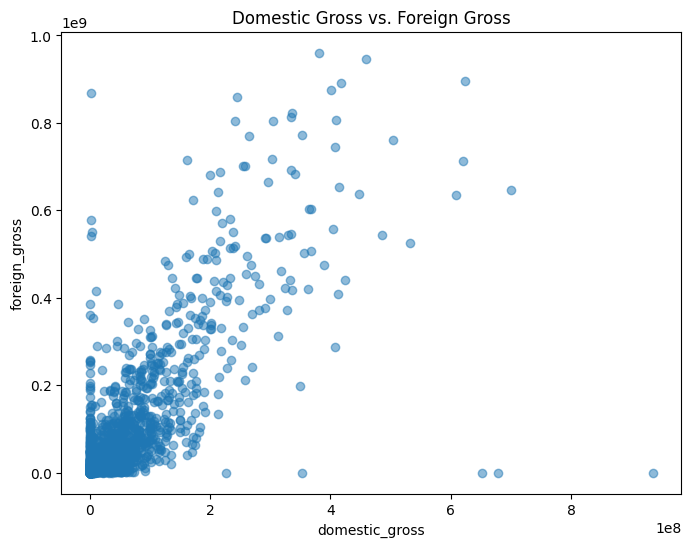

In [ ]:
# A scatter plot to show correlation
x = Movie_gross['domestic_gross']
y = Movie_gross['foreign_gross']


plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5)
plt.title('Domestic Gross vs. Foreign Gross')
plt.xlabel('domestic_gross')
plt.ylabel('foreign_gross')


plt.show()


In [ ]:
# Top grossing studio
studioDomestic_gross = Movie_gross.groupby('studio')['domestic_gross'].sum()

# Sort the studios by total gross in descending order and select the top 5
top_5_studios = studioDomestic_gross.sort_values(ascending=False).head(5)

print(top_5_studios)


studio
BV      1.839653e+10
Uni.    1.289204e+10
WB      1.212360e+10
Fox     1.092450e+10
Sony    8.459479e+09
Name: domestic_gross, dtype: float64


In [ ]:
#creating a tree map for most grossing studios
import plotly.express as px


studio_gross = Movie_gross.groupby('studio')[['domestic_gross', 'foreign_gross']].sum()

studio_gross['total_gross'] = studio_gross['domestic_gross'] + studio_gross['foreign_gross']
top_studios = studio_gross.sort_values(by='total_gross', ascending=False).index[:5].tolist()

print(top_studios)


['BV', 'Fox', 'WB', 'Uni.', 'Sony']


In [ ]:
top_studios_df = Movie_gross[Movie_gross['studio'].isin(top_studios)]

# Create a tree map using Plotly Express
fig = px.treemap(top_studios_df,
                 path=['studio'],
                 values='domestic_gross',
                 color='domestic_gross',
                 color_continuous_scale='Viridis',
                 title='Top 5 domestic Grossing Studios')

fig.show()

In [ ]:
fig = px.treemap(top_studios_df,
                 path=['studio'],
                 values='foreign_gross',
                 color='foreign_gross',
                 color_continuous_scale='Viridis',
                 title='Top 5 domestic Grossing Studios')

fig.show()

In [ ]:
# Top grossing studio
studioforeign_gross = Movie_gross.groupby('studio')['foreign_gross'].sum()

# Sort the studios by total gross in descending order and select the top 5
top_5_studios = studioforeign_gross.sort_values(ascending=False).head(5)

print(top_5_studios)

studio
BV      2.579385e+10
Fox     2.005587e+10
WB      1.866790e+10
Uni.    1.685477e+10
Sony    1.394535e+10
Name: foreign_gross, dtype: float64


In [ ]:
Movieinfo=pd.read_csv("movie_info.csv")
Movieinfo.head(2)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One


In [ ]:
Movieinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [ ]:
#determing most popular genres
genre_counts = Movieinfo['genre'].value_counts()
popular_genre = genre_counts.sort_values(ascending=False)
print("Most Popular genres:")
print(popular_genre.head(10))

Most Popular genres:
Drama                                              151
Comedy                                             110
Comedy|Drama                                        80
Drama|Mystery and Suspense                          67
Art House and International|Drama                   62
Action and Adventure|Drama                          42
Action and Adventure|Drama|Mystery and Suspense     40
Drama|Romance                                       35
Comedy|Romance                                      32
Art House and International|Comedy|Drama            31
Name: genre, dtype: int64


In [ ]:
#Creating a chart
import matplotlib.pyplot as plt

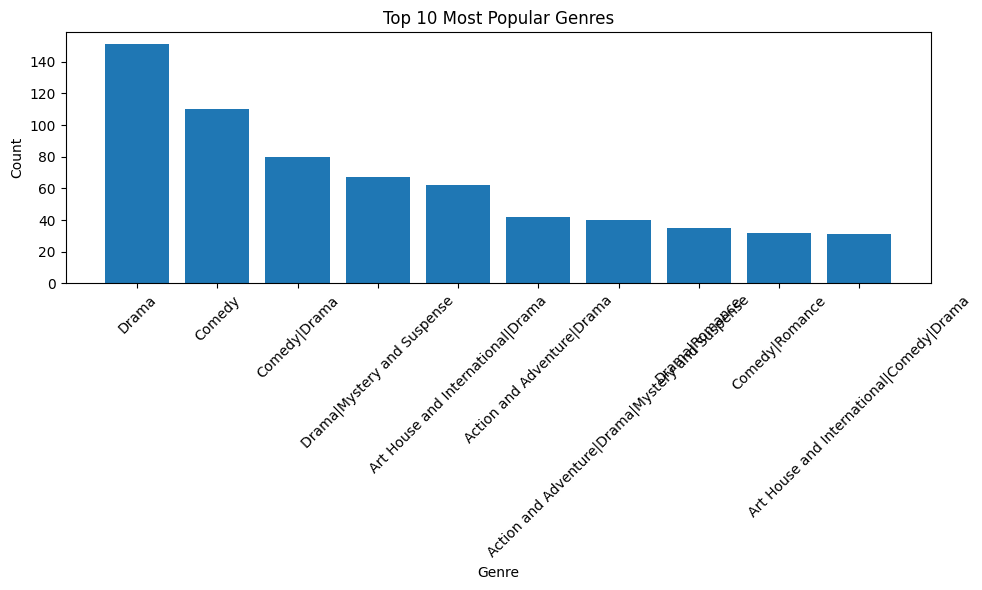

In [ ]:


# Plot a bar chart
plt.figure(figsize=(10, 6))
plt.bar(popular_genre_df['Genre'][:10], popular_genre_df['Count'][:10])
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Top 10 Most Popular Genres')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()






In [ ]:
Movie_budgets=pd.read_csv("tn.movie_budgets.csv.gz")
Movie_budgets.head(2)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


In [ ]:
Movie_budgets.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [ ]:
# Changing data type
Movie_budgets['production_budget'] =  Movie_budgets['production_budget'].str.replace(',', '').str.replace('$', '')

Movie_budgets['production_budget'] = Movie_budgets['production_budget'].astype(float)

<ipython-input-74-5976022b572a>:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [ ]:
# Changing data type
Movie_budgets['domestic_gross'] =  Movie_budgets['domestic_gross'].str.replace(',', '').str.replace('$', '')
Movie_budgets['domestic_gross'] = Movie_budgets['domestic_gross'].astype(float)

<ipython-input-75-5ca7f94c4870>:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [ ]:
# Changing data type
Movie_budgets['worldwide_gross'] =  Movie_budgets['worldwide_gross'].str.replace(',', '').str.replace('$', '')
Movie_budgets['worldwide_gross'] = Movie_budgets['worldwide_gross'].astype(float)

<ipython-input-76-80a5a1d2d372>:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [ ]:
#mising points for first 1000 columns
missingvalue =Movie_budgets.isnull() .sum()
missingvalue[0:1000]


id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [ ]:
#correlation
correlation = Movie_budgets['production_budget'].corr(Movie_budgets['domestic_gross'])
print(correlation)

0.6856818396752725


In [ ]:
#correlation
correlation = Movie_budgets['production_budget'].corr(Movie_budgets['worldwide_gross'])
print(correlation)

0.7483059765694748


Text(0, 0.5, 'domestic_gross')

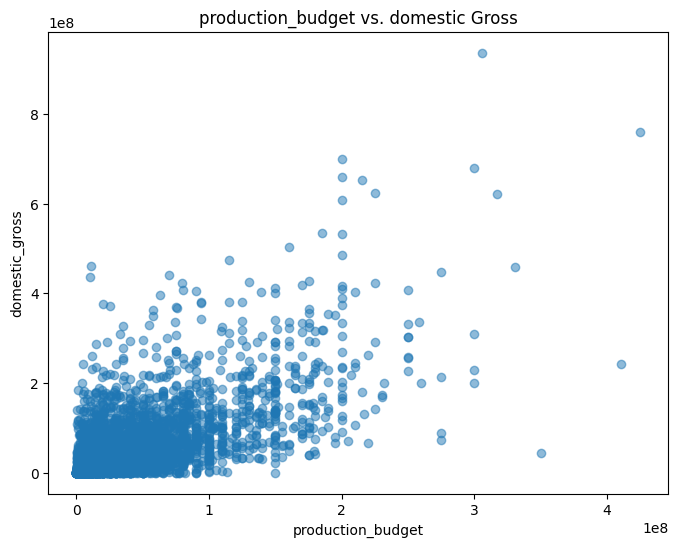

In [ ]:
# A scatter plot to show correlation
x = Movie_budgets['production_budget']
y = Movie_budgets['domestic_gross']


plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5)
plt.title('production_budget vs. domestic Gross')
plt.xlabel('production_budget')
plt.ylabel('domestic_gross')

Text(0, 0.5, 'worldwide_gross')

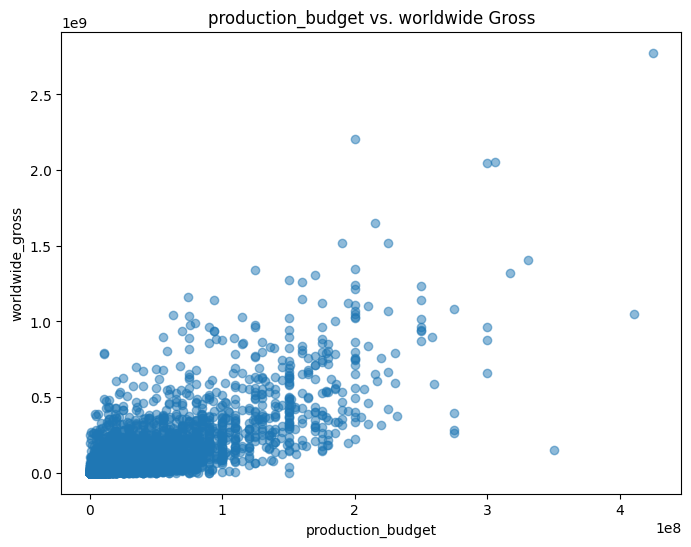

In [ ]:
# A scatter plot to show correlation
x = Movie_budgets['production_budget']
y = Movie_budgets['worldwide_gross']


plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5)
plt.title('production_budget vs. worldwide Gross')
plt.xlabel('production_budget')
plt.ylabel('worldwide_gross')